## Лабораторная работа № 1 - Работа с библиотекой pandas в Python. Упражнения

In [47]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Class  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3                     0.167   21      0  
4                     2.288   33      1  
5                     0.201   30      0  
6                     0.248   26      1  
7                     0.134   29      0  
8                     0.158   53      1  
9                     0.232   54      1

Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [49]:
result = data.isna().sum()
print(result)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [50]:
for i in data.columns:
  if data[i].dtype == 'int64':
    data[i] = data[i].fillna(data[i].median())
  elif data[i].dtype == 'float64':
    data[i] = data[i].fillna(data[i].mean())

print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [72]:
statistics = data.describe()
disp = data.var()

print("Основные статистики:\n", statistics)
print("\nДисперсия:\n", disp)

Основные статистики:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age       Class  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.20

__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [54]:
result = data[(data['Age'] > 50) & (data['Class'] == 1)]

result = result.shape[0]
print(result)

38


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [55]:
result = data.sort_values(by='Pregnancies', ascending=False).head(3)
result

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
159           17    163.0           72.0           41.0    114.0  40.9   
88            15    136.0           70.0           32.0    110.0  37.1   
298           14    100.0           78.0           25.0    184.0  36.6   

     DiabetesPedigreeFunction  Age  Class  
159                     0.817   47      1  
88                      0.153   43      1  
298                     0.412   46      1

__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [56]:
result = data[(data['Age'] >= 30) & (data['Age'] <= 40) & (data['Pregnancies'] >= 3)]

result = result.shape[0]
print(result)

142


__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [57]:
result = data[(data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]

result = (result.shape[0] / data.shape[0]) * 100
print(result)

18.880208333333336


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [58]:
average = data['BloodPressure'].mean()

fat = data[data['BMI'] >= 30]

result = fat[fat['BloodPressure'] > average]

result = result.shape[0]
print(result)

274


__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [59]:
diabetic = data[data['Class'] == 1][['Glucose', 'BloodPressure', 'Insulin']].mean()
nonDiabetic = data[data['Class'] == 0][['Glucose', 'BloodPressure', 'Insulin']].mean()

# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("С диабетом:\n", diabetic['Glucose'])
print("\nБез диабета:\n", nonDiabetic['Glucose'])

С диабетом:
 142.16557285655603

Без диабета:
 110.71012057667103


In [60]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("С диабетом:\n", diabetic['BloodPressure'])
print("\nБез диабета:\n", nonDiabetic['BloodPressure'])

С диабетом:
 75.14732442833582

Без диабета:
 70.93539699863575


In [61]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("С диабетом:\n", diabetic['Insulin'])
print("\nБез диабета:\n", nonDiabetic['Insulin'])

С диабетом:
 180.43154784453367

Без диабета:
 142.2107614213198


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

<Axes: xlabel='BloodPressure', ylabel='Count'>

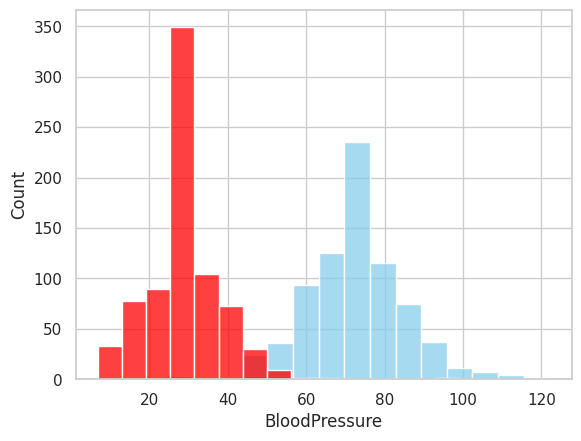

In [62]:
sns.set(style="whitegrid")

sns.histplot(data['BloodPressure'], kde=False, color='skyblue', label='BloodPressure', bins=15)
sns.histplot(data['SkinThickness'], kde=False, color='red', label='SkinThickness', bins=15)


__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

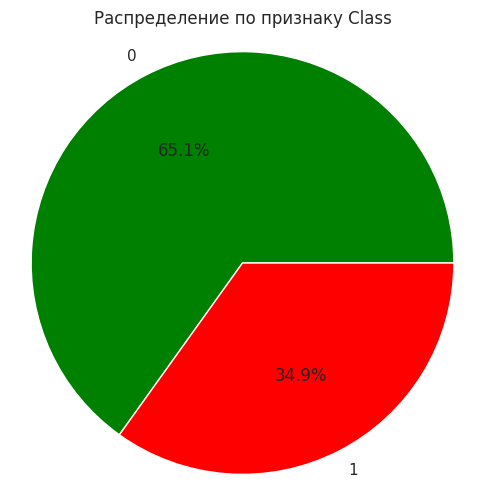

In [63]:
result = data['Class'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(result, labels=['0', '1'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Распределение по признаку Class')
plt.axis('equal')
plt.show()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным.

<Axes: xlabel='Age', ylabel='Density'>

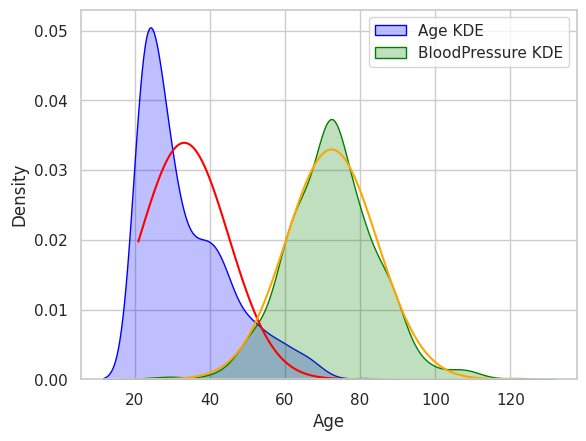

In [69]:
sns.kdeplot(data['Age'], color='blue', label='Age KDE', fill=True)
sns.lineplot(x=np.linspace(data['Age'].min(), data['Age'].max(), 100), y=norm.pdf(np.linspace(data['Age'].min(), data['Age'].max(), 100), data['Age'].mean(), data['Age'].std()), color='red')

sns.kdeplot(data['BloodPressure'], color='green', label='BloodPressure KDE', fill=True)
sns.lineplot(x=np.linspace(data['BloodPressure'].min(), data['BloodPressure'].max(), 100), y=norm.pdf(np.linspace(data['BloodPressure'].min(), data['BloodPressure'].max(), 100), data['BloodPressure'].mean(), data['BloodPressure'].std()), color='orange')

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [37]:
data['wasPregnant'] = (data['Pregnancies'] > 0).astype(int)

data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Class  wasPregnant  
0                     0.627   50      1            1  
1                     0.351   31      0            1  
2                     0.672   32      1            1  
3                     0.167   21      0            1  
4                     2.288   33      1            0  
5                     0.201   30      0            1  
6                     0.248   26      1            1  
7                     0.134   29      0            1  
8                     0.158   53      1            1  
9                     0.232   54      1            1

__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [41]:
grouped_data = data.groupby('wasPregnant')['Class'].mean() * 100

grouped_data

wasPregnant
0    34.234234
1    35.007610
Name: Class, dtype: float64

__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__

Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [43]:
borders = [0, 18.5, 25, 30, float('inf')]
tags = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

data['bodyType'] = pd.cut(data['BMI'], bins=borders, labels=tags, right=False)

data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   
5            5    116.0           74.0            NaN      NaN  25.6   
6            3     78.0           50.0           32.0     88.0  31.0   
7           10    115.0            NaN            NaN      NaN  35.3   
8            2    197.0           70.0           45.0    543.0  30.5   
9            8    125.0           96.0            NaN      NaN   NaN   

   DiabetesPedigreeFunction  Age  Class  wasPregnant       bodyType  
0                     0.627   50      1            1        Obesity  
1                     0.351   31      0            1     Overweight  
2                     0.672   32      1            1  Normal weight  
3                     0.167   21      0            1     Overweight  
4                     2.288   33      1            0        Obesity  
5                     0.201   30      0            1     Overweight  
6                     0.248   26      1            1        Obesity  
7                     0.134   29      0            1        Obesity  
8                     0.158   53      1            1        Obesity  
9                     0.232   54      1            1            NaN

__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [45]:
healthy = data[(data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)]

diabetes = healthy['Class'].mean() * 100
print(diabetes)

10.0
